# See bottom for best work
## t-SNE using the tsne library on MINST

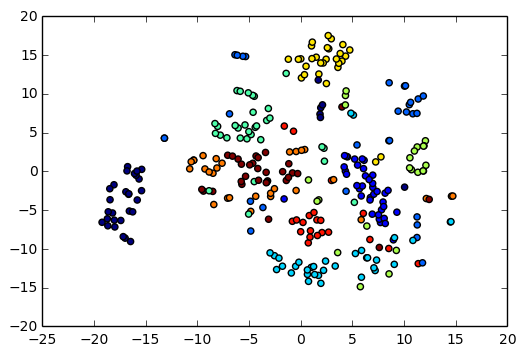

In [12]:
%matplotlib inline

import numpy as np
from skdata.mnist.views import OfficialImageClassification
from matplotlib import pyplot as plt
from tsne import bh_sne

# load up data
data = OfficialImageClassification(x_dtype="float32")
x_data = data.all_images
y_data = data.all_labels

# convert image data to float64 matrix. float64 is need for bh_sne
x_data = np.asarray(x_data).astype('float64')
x_data = x_data.reshape((x_data.shape[0], -1))

# For speed of computation, only run on a subset
n = 300
x_data = x_data[:n]
y_data = y_data[:n]

# perform t-SNE embedding
vis_data = bh_sne(x_data)

# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

cmap = plt.cm.get_cmap("jet", 10)
plt.scatter(vis_x, vis_y, c=y_data)
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
plt.show()

In [7]:
x_data.shape

(300, 784)

In [9]:
data.all_images.shape

(70000, 28, 28, 1)

## t-SNE using SciKitLearn library on random S shaped curve

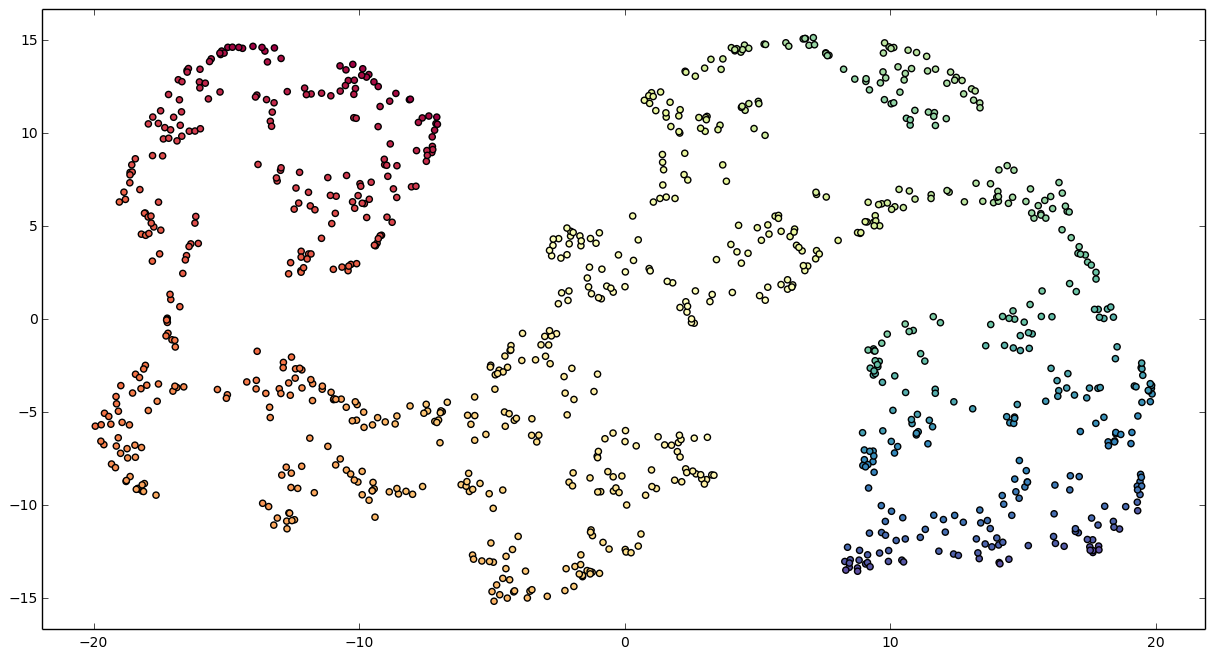

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))

tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)

plt.axis('tight')

plt.show()

# Pictures in place of dots using tsne library and MINST

In [16]:
from tsne import bh_sne
import numpy as np
from skimage.transform import resize

from matplotlib import pyplot as plt

def gray_to_color(img):
    if len(img.shape) == 2:
        img = np.invert(img)
        img = np.dstack((img, img, img))
    return img

def min_resize(img, size):
    """
    Resize an image so that it is size along the minimum spatial dimension.
    """
    w, h = map(float, img.shape[:2])
    if min([w, h]) != size:
        if w <= h:
            img = resize(img, (int(round((h/w)*size)), int(size)))
        else:
            img = resize(img, (int(size), int(round((w/h)*size))))
    return img

def image_scatter(features, images, img_res, res=4000, cval=1.):
    """
    Embeds images via tsne into a scatter plot.
    Parameters
    ---------
    features: numpy array
        Features to visualize
    images: list or numpy array
        Corresponding images to features. Expects float images from (0,1).
    img_res: float or int
        Resolution to embed images at
    res: float or int
        Size of embedding image in pixels
    cval: float or numpy array
        Background color value
    Returns
    ------
    canvas: numpy array
        Image of visualization
    """
    features = np.copy(features).astype('float64')
    images = [gray_to_color(image) for image in images]
    images = [min_resize(image, img_res) for image in images]
    max_width = max([image.shape[0] for image in images])
    max_height = max([image.shape[1] for image in images])

    f2d = bh_sne(features) # docs: https://github.com/danielfrg/tsne
    # alternative: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE


    xx = f2d[:, 0]
    yy = f2d[:, 1]
    x_min, x_max = xx.min(), xx.max()
    y_min, y_max = yy.min(), yy.max()
    # Fix the ratios
    sx = (x_max-x_min)
    sy = (y_max-y_min)
    if sx > sy:
        res_x = sx/float(sy)*res
        res_y = res
    else:
        res_x = res
        res_y = sy/float(sx)*res

    canvas = np.ones((res_x+max_width, res_y+max_height, 3))*cval
    x_coords = np.linspace(x_min, x_max, res_x)
    y_coords = np.linspace(y_min, y_max, res_y)
    for x, y, image in zip(xx, yy, images):
        w, h = image.shape[:2]
        x_idx = np.argmin((x - x_coords)**2)
        y_idx = np.argmin((y - y_coords)**2)
        canvas[x_idx:x_idx+w, y_idx:y_idx+h] = image
    return canvas

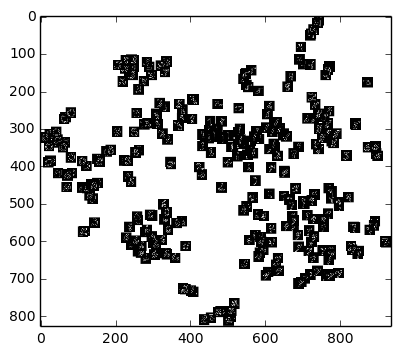

In [31]:
from skdata.mnist.views import OfficialImageClassification
# load up data
data = OfficialImageClassification(x_dtype="float32")
x_data = data.all_images
y_data = data.all_labels

# convert image data to float64 matrix. float64 is need for bh_sne
x_data = np.asarray(x_data).astype('float64')
x_data = x_data.reshape((x_data.shape[0], -1))

# For speed of computation, only run on a subset
n = 300
x_data = x_data[:n]
y_data = y_data[:n]

image_size=28
plot_size=800
canvas = image_scatter(x_data, data.all_images, image_size, plot_size)
plt.imshow(canvas)
plt.imsave('canvas.jpg', canvas)

# Pictures in place of dots on Barcode images (tsne library)

In [2]:
%matplotlib inline

from tsne import bh_sne
import numpy as np
from skimage.transform import resize

from matplotlib import pyplot as plt

def gray_to_color(img):
    if len(img.shape) == 2:
        img = np.invert(img)
        img = np.dstack((img, img, img))
    return img

def min_resize(img, size):
    """
    Resize an image so that it is size along the minimum spatial dimension.
    """
    w, h = map(float, img.shape[:2])
    if min([w, h]) != size:
        if w <= h:
            img = resize(img, (int(round((h/w)*size)), int(size)))
        else:
            img = resize(img, (int(size), int(round((w/h)*size))))
    return img

def image_scatter(features, images, img_res, res=4000, cval=1.):
    """
    Embeds images via tsne into a scatter plot.
    Parameters
    ---------
    features: numpy array
        Features to visualize
    images: list or numpy array
        Corresponding images to features. Expects float images from (0,1).
    img_res: float or int
        Resolution to embed images at
    res: float or int
        Size of embedding image in pixels
    cval: float or numpy array
        Background color value
    Returns
    ------
    canvas: numpy array
        Image of visualization
    """
    features = np.copy(features).astype('float64')
    images = [gray_to_color(image) for image in images]
    images = [min_resize(image, img_res) for image in images]
    max_width = max([image.shape[0] for image in images])
    max_height = max([image.shape[1] for image in images])

     f2d = bh_sne(features) # docs: https://github.com/danielfrg/tsne
    # alternative: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

    xx = f2d[:, 0]
    yy = f2d[:, 1]
    x_min, x_max = xx.min(), xx.max()
    y_min, y_max = yy.min(), yy.max()
    # Fix the ratios
    sx = (x_max-x_min)
    sy = (y_max-y_min)
    if sx > sy:
        res_x = sx/float(sy)*res
        res_y = res
    else:
        res_x = res
        res_y = sy/float(sx)*res

    canvas = np.ones((res_x+max_width, res_y+max_height, 3))*cval
    x_coords = np.linspace(x_min, x_max, res_x)
    y_coords = np.linspace(y_min, y_max, res_y)
    for x, y, image in zip(xx, yy, images):
        w, h = image.shape[:2]
        x_idx = np.argmin((x - x_coords)**2)
        y_idx = np.argmin((y - y_coords)**2)
        canvas[x_idx:x_idx+w, y_idx:y_idx+h] = image
    return canvas

### Load barcode images and display an example

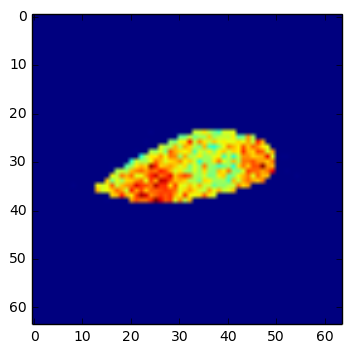

In [3]:
from PIL import Image
from matplotlib import pyplot as plt
import glob
images = []
for filename in glob.glob('barcode_images/*.jpg'):
    im=Image.open(filename)
    im=np.array(im)
    images.append(im)

plt.imshow(images[0])

Populating the interactive namespace from numpy and matplotlib


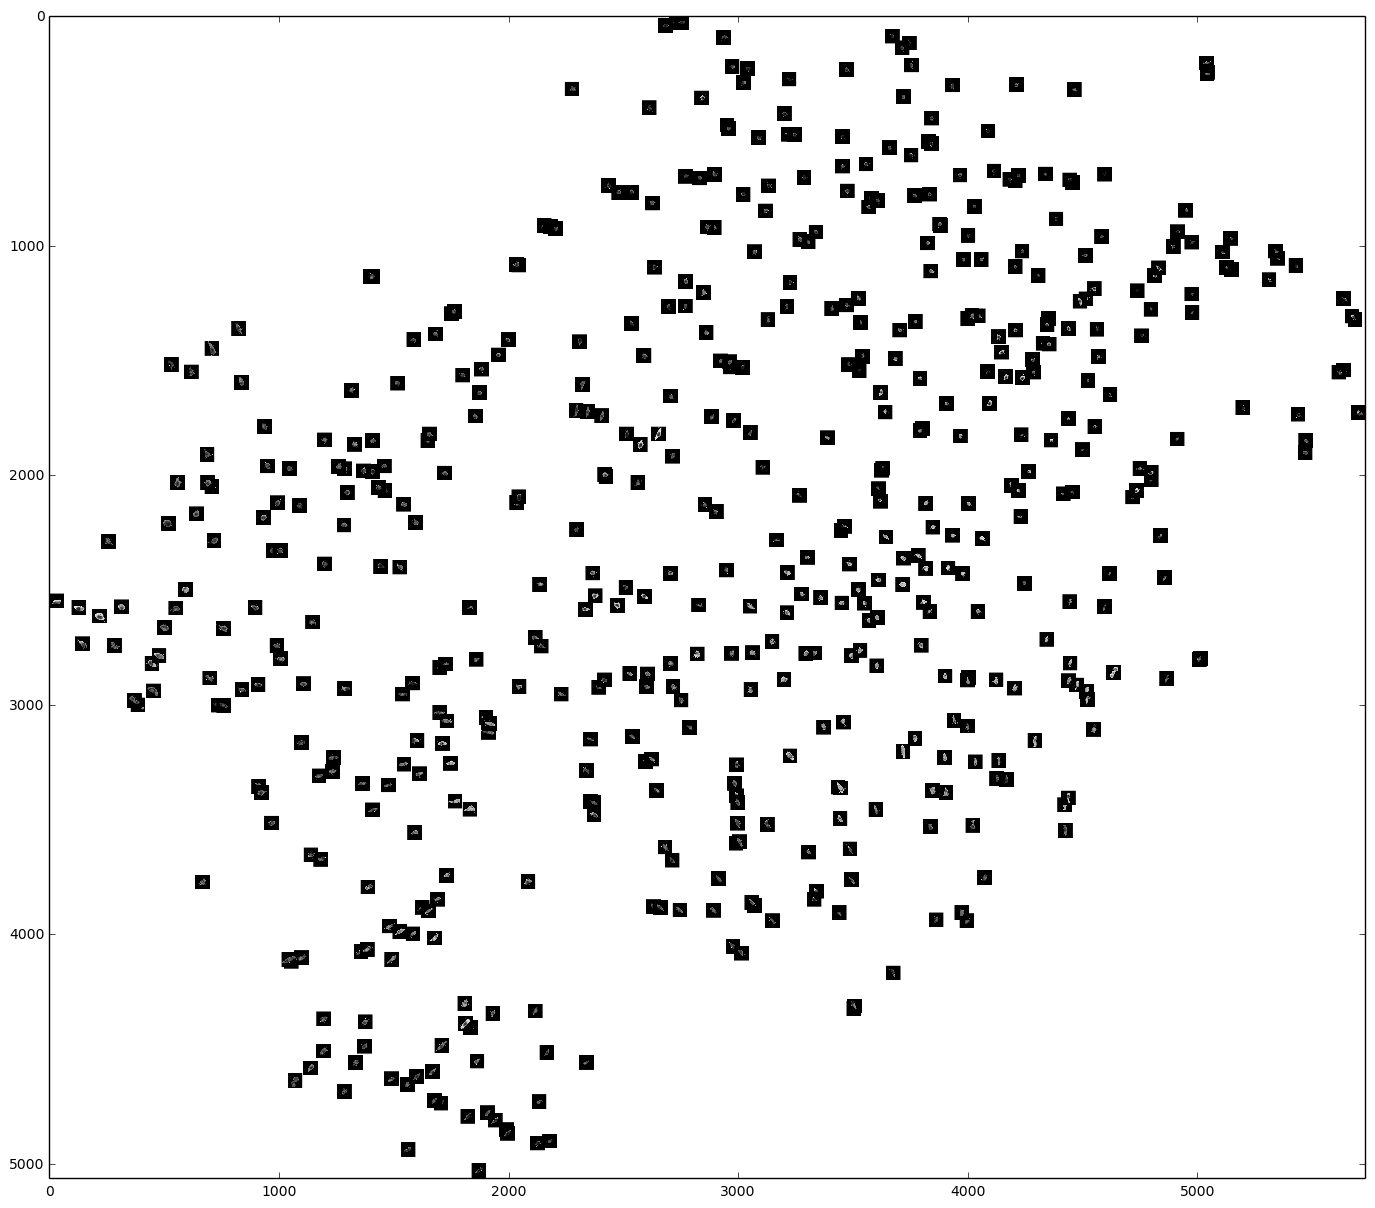

In [13]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)

x_data = np.asarray(images).astype('float64') # convert image data to float64 matrix. float64 is need for bh_sne
x_data = x_data.reshape((x_data.shape[0], -1)) # reshape 2d image into 1d array

# For speed of computation, only run on a subset
# n = 100
# x_data = x_data[:n]

image_size=64
plot_size=5000
canvas = image_scatter(x_data, images, image_size, plot_size)
plt.imshow(canvas)
plt.imsave('barcode_canvas.jpg', canvas)

## Modify the above to add text to scatter for each cell barcode classification

In [36]:
%matplotlib inline

from tsne import bh_sne
import numpy as np
from skimage.transform import resize

from matplotlib import pyplot as plt

def gray_to_color(img):
    if len(img.shape) == 2:
        img = np.invert(img)
        img = np.dstack((img, img, img))
    return img

def min_resize(img, size):
    """
    Resize an image so that it is size along the minimum spatial dimension.
    """
    w, h = map(float, img.shape[:2])
    if min([w, h]) != size:
        if w <= h:
            img = resize(img, (int(round((h/w)*size)), int(size)))
        else:
            img = resize(img, (int(size), int(round((w/h)*size))))
    return img

class_to_colour = {
    'NES': (0,10,0),
    'NUC': (100,100,100),
    'WC': (0,0,10),
    'Peroxi': (10,0,0)
}

def image_scatter(features, images, classes, img_res, res=4000, cval=1., perplexity=30):
    """
    Embeds images via tsne into a scatter plot.
    Parameters
    ---------
    features: numpy array
        Features to visualize
    images: list or numpy array
        Corresponding images to features. Expects float images from (0,1).
    img_res: float or int
        Resolution to embed images at
    res: float or int
        Size of embedding image in pixels
    cval: float or numpy array
        Background color value
    Returns
    ------
    canvas: numpy array
        Image of visualization
    """
    features = np.copy(features).astype('float64')
    images = [gray_to_color(image) for image in images]
    images = [min_resize(image, img_res) for image in images]
    max_width = max([image.shape[0] for image in images])
    max_height = max([image.shape[1] for image in images])

    f2d = bh_sne(features, perplexity=perplexity) # docs: https://github.com/danielfrg/tsne
    # alternative: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

    xx = f2d[:, 0]
    yy = f2d[:, 1]
    x_min, x_max = xx.min(), xx.max()
    y_min, y_max = yy.min(), yy.max()
    # Fix the ratios
    sx = (x_max-x_min)
    sy = (y_max-y_min)
    if sx > sy:
        res_x = sx/float(sy)*res
        res_y = res
    else:
        res_x = res
        res_y = sy/float(sx)*res

    canvas = np.ones((res_x+max_width, res_y+max_height, 3))*cval
    x_coords = np.linspace(x_min, x_max, res_x)
    y_coords = np.linspace(y_min, y_max, res_y)
    for x, y, image, c in zip(xx, yy, images, classes):
        w, h = image.shape[:2]
        x_idx = np.argmin((x - x_coords)**2)
        y_idx = np.argmin((y - y_coords)**2)
        canvas[x_idx-5:x_idx+w+5, y_idx-5:y_idx+h+5] = class_to_colour[c]
        canvas[x_idx:x_idx+w, y_idx:y_idx+h] = image
    return canvas

Populating the interactive namespace from numpy and matplotlib
barcode_images/h2a_2 NUC CFP1.jpg


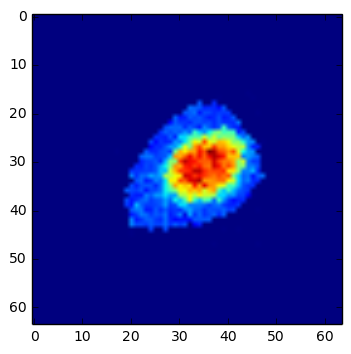

In [39]:
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)

from PIL import Image
from matplotlib import pyplot as plt
import glob
images = []
filenames = []
for filename in glob.glob('barcode_images/*.jpg'):
    filenames.append(filename)
    im=Image.open(filename)
    im=np.array(im)
    images.append(im)

print(filenames[0])
plt.imshow(images[0])

In [40]:
import glob
classes = []
for filename in glob.glob('barcode_images/*.jpg'):
    if 'NES' in filename:
      classes.append('NES')
    elif 'NUC' in filename:
      classes.append('NUC')
    elif 'WC' in filename:
      classes.append('WC')
    elif 'Peroxi' in filename:
      classes.append('Peroxi')
    else:
      classes.append('none')

print(classes[0])

NUC


Populating the interactive namespace from numpy and matplotlib


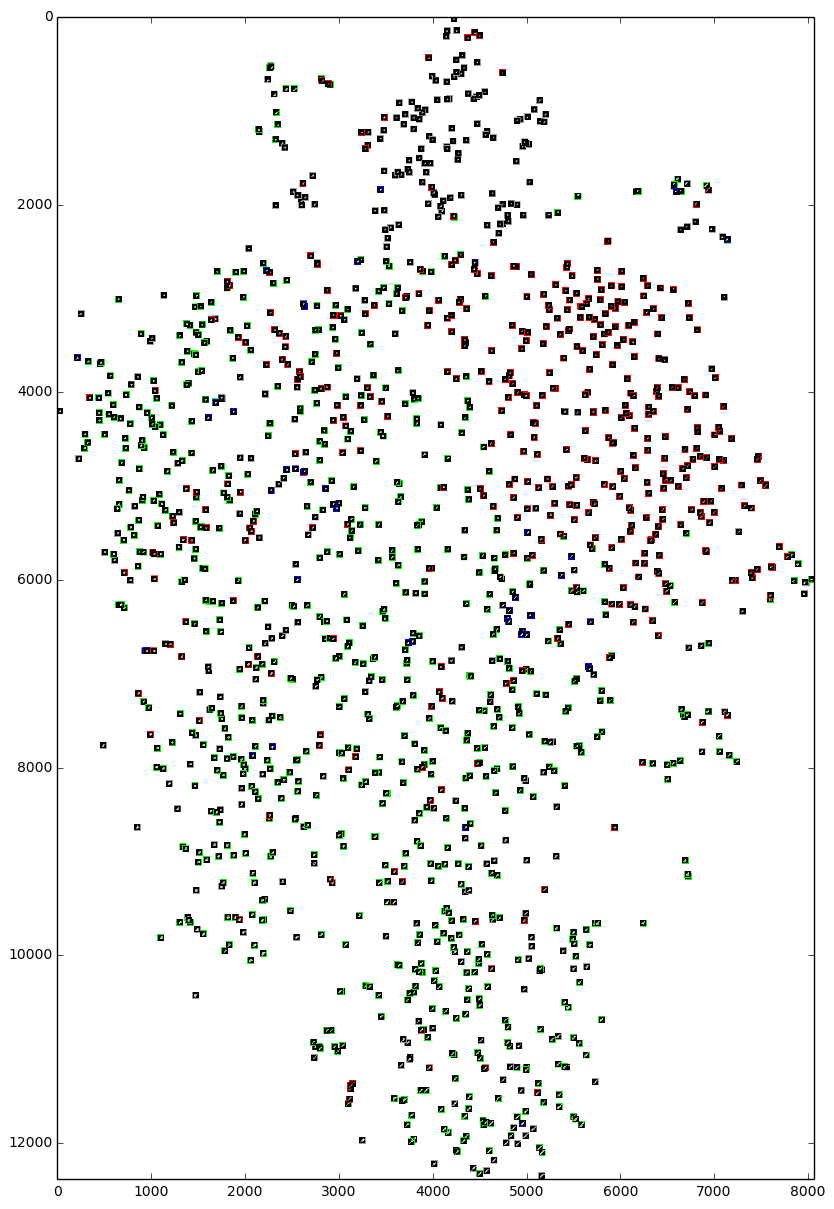

In [50]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)

x_data = np.asarray(images).astype('float64') # convert image data to float64 matrix. float64 is need for bh_sne
x_data = x_data.reshape((x_data.shape[0], -1)) # reshape 2d image into 1d array

# For speed of computation, only run on a subset
#n = 100
#x_data = x_data[:n]

image_size=64
plot_size=8000
perplexity=20
canvas = image_scatter(x_data, images, classes, image_size, plot_size, perplexity=perplexity)
plt.imshow(canvas)
plt.imsave('barcode_canvas.jpg', canvas)
